In [1]:
from utility_dfplotter import *
import sys

In [2]:
v,a,b,step,xl = 'lepton3_iso',-0.5,5,1,r'Isolation of $j \rightarrow \bar{\tau}$'
bins    = np.arange(a,b,step)
centers = bins[:-1]+step/2



# tt
pickles  = glob.glob("../data/pickles/emu_tau/mctt/ntuple_ttbar_inclusive.pkl")
MCtt = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
htt  = np.histogram( MCtt [v], bins, weights = MCtt .eventWeight)[0]
htt = htt[::-1]
htt = np.cumsum(htt)[::-1]

# tt1
pickles  = glob.glob("../data/pickles/emu_tau/mctt/ntuple_ttbar_inclusive_FSRUp.pkl")
MCtt1 = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
htt1 = np.histogram( MCtt1[v], bins, weights = MCtt1.eventWeight)[0]
htt1 = htt1[::-1]
htt1 = np.cumsum(htt1)[::-1]

# tt2
pickles  = glob.glob("../data/pickles/emu_tau/mctt/ntuple_ttbar_inclusive_FSRDown.pkl")
MCtt2 = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
htt2 = np.histogram( MCtt2[v], bins, weights = MCtt2.eventWeight)[0]
htt2 = htt2[::-1]
htt2 = np.cumsum(htt2)[::-1]

# Diboson
pickles  = glob.glob("../data/pickles/emu_tau/mcdiboson/*.pkl")
MCzz = pd.concat([ pd.read_pickle(pickle) for pickle in pickles ], ignore_index=True)
hzz = np.histogram( MCzz[v], bins, weights = MCzz.eventWeight)[0]
hzz = hzz[::-1]
hzz = np.cumsum(hzz)[::-1]

# DY
pickles  = glob.glob("../data/pickles/emu_tau/mcdy/*.pkl")
MCdy = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
hdy = np.histogram( MCdy[v], bins, weights = MCdy.eventWeight)[0]
hdy = hdy[::-1]
hdy = np.cumsum(hdy)[::-1]

# tW
pickles  = glob.glob("../data/pickles/emu_tau/mct/*.pkl")
MCt = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
ht = np.histogram( MCt[v], bins, weights = MCt.eventWeight)[0]
ht = ht[::-1]
ht = np.cumsum(ht)[::-1]

# data
pickles  = glob.glob("../data/pickles/emu_tau/data2016/*.pkl")
Data = pd.concat([ pd.read_pickle(pickle) for pickle in pickles], ignore_index=True)
hdata = np.histogram( Data[v], bins, weights = Data.eventWeight)[0]
hdata = hdata[::-1]
hdata = np.cumsum(hdata)[::-1]

# n = []
# for iso in [0,1,3,7,15]:
#     slt = MCtt.lepton3_iso==iso
#     n.append( np.sum(MCtt[slt].eventWeight) )
# n = np.array(n)
    


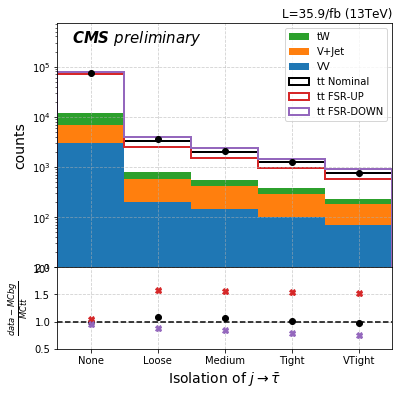

In [19]:
fig, axes = plt.subplots(2, 1, sharex=True, 
             facecolor='w',
             gridspec_kw={'height_ratios':[3,1]},
             figsize=(6,6))
fig.subplots_adjust(hspace=0)

# kinematic plots
ax = axes[0]

hbg = hzz+hdy+ht
ax.hist([centers,centers,centers], bins=bins, 
         weights=[hzz,hdy,ht],color=['C0','C1','C2'],
         histtype="stepfilled",stacked=True,linewidth=0,alpha=1,
         label=['VV',"V+Jet","tW"]
        )

ax.hist([centers,centers,centers], bins=bins, 
         weights=[hbg+htt2,hbg+htt1,hbg+htt],
         color=['C4','C3','k'],
         histtype="step",stacked=False,linewidth=2,alpha=1,
         label=['tt FSR-DOWN','tt FSR-UP','tt Nominal']
        )

ax.errorbar(centers,hdata,yerr=hdata**0.5, fmt='o',color='k',markersize=6,linewidth=1,alpha=1)

ax.legend()
ax.grid(True,linestyle='--',alpha=0.6)
ax.set_yscale('log')

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(10, 10*hdata.max())
ax.set_ylabel('counts',fontsize=14)
ax.set_title("L=35.9/fb (13TeV)",loc="right")
ax.text(0.04*b+0.96*a, 4*hdata.max(), r'CMS $preliminary$', style="italic",fontsize="15",fontweight='bold')

ax = axes[1]
ax.errorbar(centers,(hdata-hbg)/htt, yerr=hdata**0.5/hdata, fmt='o',color='k',markersize=6,linewidth=1,alpha=1)
ax.errorbar(centers,(hdata-hbg)/htt1,yerr=hdata**0.5/hdata,  fmt='X',color='C3',markersize=6,linewidth=1,alpha=1)
ax.errorbar(centers,(hdata-hbg)/htt2,yerr=hdata**0.5/hdata, fmt='X',color='C4',markersize=6,linewidth=1,alpha=1)

ax.axhline(1,color='k',linestyle='--')
ax.set_ylabel(r'$\frac{data-MCbg}{MCtt}$',fontsize=12)

ax.grid(True,linestyle='--',alpha=0.6)
ax.set_xlabel(xl,fontsize=14)
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.5,2)

plt.xticks(np.array([0,1,2,3,4]),['None','Loose','Medium','Tight','VTight'])

plt.savefig('../plots/test2.png',dpi=300)



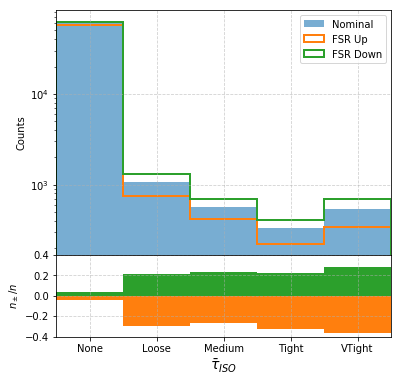

In [162]:

fig, axes = plt.subplots(2, 1, sharex=True, 
             facecolor='w',
             gridspec_kw={'height_ratios':[3,1]},
             figsize=(6,6))
fig.subplots_adjust(hspace=0)

# kinematic plots
ax = axes[0]
            
mybins = np.arange(-0.5, 5.)
mctt  = ax.hist(MCtt['lepton3_iso'], mybins,weights=MCtt.eventWeight, alpha=0.6, color='C0',label='Nominal')[0]
mctt1 = ax.hist(MCtt1['lepton3_iso'],mybins,weights=MCtt1.eventWeight,histtype='step',lw=2,label='FSR Up',color='C1')[0]
mctt2 = ax.hist(MCtt2['lepton3_iso'],mybins,weights=MCtt2.eventWeight,histtype='step',lw=2,label='FSR Down',color='C2')[0]
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.legend()
ax.grid(True,linestyle='--',alpha=0.6)
ax.set_xlim(-0.5, 4.5)


ax = axes[1]
ax.hist(mybins[:-1],mybins,weights=(mctt1/mctt-1),color='C1')
ax.hist(mybins[:-1],mybins,weights=(mctt2/mctt-1),color='C2')
ax.grid(True,linestyle='--',alpha=0.6)
ax.set_ylabel(r'$n_\pm /n$')
ax.set_xlabel(r'$\bar{\tau}_{ISO}$',fontsize=14)
#ax.xaxis.set_label_coords(0.95, -0.1)
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.4,.4)



plt.xticks(np.array([0,1,2,3,4]),['None','Loose','Medium','Tight','VTight'])
plt.savefig('test.png',dpi=300)



In [51]:
mctt[0]

array([62816.23904775,  1302.63371823,   698.89066785,   401.12453342,
         690.92510529])